In [1]:
import os
os.chdir('../../src')

from dataset import MNIST, viz_ndarray
from dataloader import DataLoader
from transforms import *
from torchvision import datasets, transforms
import torch

 >>> data/MNIST/raw/train-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte already exists <<<
 :O already a tensor


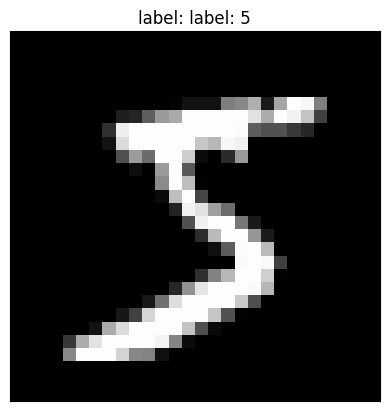

-- these are examples of training 5 data points (shape of tensor and label):
(1, 28, 28) 5
(1, 28, 28) 0
(1, 28, 28) 4
(1, 28, 28) 1
(1, 28, 28) 9
x type: <class 'tensor.Tensor'> and dtype: float64, y type: <class 'int'>
x shape: (1, 28, 28), y shape: no shape its an int


In [3]:
train_data=MNIST(root='data', train=True, download=True,transform=ToTensor())

viz_ndarray(train_data[0][0],label=f'label: {train_data[0][1]}', squeeze=True)
print('-- these are examples of training 5 data points (shape of tensor and label):')
for i in range(5):
    print(train_data[i][0].shape, train_data[i][1])

for x,y in train_data:
    print(f'x type: {type(x)} and dtype: {x.data.dtype}, y type: {type(y)}')
    print(f'x shape: {x.shape}, y shape: no shape its an int')
    break

In [7]:
torch_train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
print('-- these are examples of training 5 data points (shape of tensor and label):')
for i in range(5):
    print(torch_train_data[i][0].shape, torch_train_data[i][1])
for x,y in torch_train_data:
    print(f'x type: {type(x)} and dtype: {x.dtype}, y type: {type(y)}')
    print(f'x shape: {x.shape}, y shape: no shape its an int')
    break

-- these are examples of training 5 data points (shape of tensor and label):
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
torch.Size([1, 28, 28]) 4
torch.Size([1, 28, 28]) 1
torch.Size([1, 28, 28]) 9
x type: <class 'torch.Tensor'> and dtype: torch.float32, y type: <class 'int'>
x shape: torch.Size([1, 28, 28]), y shape: no shape its an int


In [2]:
# validation that MNIST is the same

# validation

my_train_data=MNIST(root='data',train=True) #Dataset
my_train_tensor=my_train_data.data #Tensor
my_train_ndarray=my_train_tensor.data #ndarray
my_train_in_torch_tensor=torch.tensor(my_train_ndarray) #torch.tensor

torch_train_data=datasets.MNIST(root='data',train=True,download=True) #torchvision.datasets.MNIST
torch_train_tensor=torch_train_data.data #torch.Tensor
# print(type(torch_train_data.data)) # <class 'torch.Tensor'>

print(torch.all(my_train_in_torch_tensor==torch_train_tensor))
# tensor(True)

 >>> File downloaded successfully as 'data/MNIST/raw/train-labels-idx1-ubyte.gz'.
 >>> File downloaded successfully as 'data/MNIST/raw/t10k-labels-idx1-ubyte.gz'.
 >>> File downloaded successfully as 'data/MNIST/raw/t10k-images-idx3-ubyte.gz'.
 >>> File downloaded successfully as 'data/MNIST/raw/train-images-idx3-ubyte.gz'.
tensor(True)


# Transforms

### ToTensor

In [12]:
transformation=ToTensor()
train_data=MNIST(root='data', train=True, download=True)

x=train_data[0][0]
print(f'before transform: min: {np.min(x.data)}, max: {np.max(x.data)}')
transformation(x) #performs transformation inplace, now x is modified
print(f'after transform: min: {np.min(x.data)}, max: {np.max(x.data)}')

 >>> data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte already exists <<<
before transform: min: 0, max: 255
 :O already a tensor
after transform: min: 0.0, max: 1.0


Now putting it into use:

In [13]:
train_data_toTensor=MNIST(root='data', train=True, download=True, transform=ToTensor())
x=train_data_toTensor[0][0]
print(f'with toTensor, min: {np.min(x.data)}, max: {np.max(x.data)}')

 >>> data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte already exists <<<
 :O already a tensor
with toTensor, min: 0.0, max: 1.0


## Normalize

In [14]:
# -- the default behavior=> standardizes tensor so should have mean 0 and std 1 is works
transformation=Normalize(inplace=True) 
train_data=MNIST(root='data', train=True, download=True)

x=Tensor([1,2,3,4,5])
print(f'\nbefore transform: {x}\n\t mean: {np.mean(x.data)}, std: {np.std(x.data)}')
transformation(x) #performs transformation inplace, now x is modified
print(f'after transform: {x}\n\t mean: {np.mean(x.data)}, std: {np.std(x.data)}')


 >>> data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte already exists <<<

before transform: Tensor([1 2 3 4 5], requires_grad=False)
	 mean: 3.0, std: 1.4142135623730951
after transform: Tensor([-1.41421356 -0.70710678  0.          0.70710678  1.41421356], requires_grad=False)
	 mean: 0.0, std: 0.9999999999999999


In [15]:
train_data_Normalize=MNIST(root='data', train=True, download=True, transform=Normalize())
x=train_data_Normalize[0][0]
print(f'with Normalize, mean: {np.mean(x.data)}, std: {np.std(x.data)}')

 >>> data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte already exists <<<
with Normalize, mean: 0.022782921000724925, std: 1.0137631855674378


## Compose

In [2]:
transformation=Compose([ToTensor(),Normalize((0.5,),(0.5,))])
train_data=MNIST(root='data', train=True, download=True, transform=transformation)

 >>> data/MNIST/raw/train-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-images-idx3-ubyte already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/train-labels-idx1-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-labels-idx1-ubyte already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists <<<
 >>> data/MNIST/raw/t10k-images-idx3-ubyte already exists <<<
>>> applying ToTensor()...
 :O already a tensor
>>> applying Normalize(mean=(0.5,), std=(0.5,)), inplace=True...
>>> [ToTensor(), Normalize(mean=(0.5,), std=(0.5,)), inplace=True] applied successfully <<<


# DataLoader

In [10]:
print('-- example from our library:')
train_loader = DataLoader(train_data, batch_size=32)

for x,y in train_loader:
    print(f'x type: {type(x)}, y type: {type(y)}')
    print(f'x shape: {x.shape}, y shape: {y.shape}')
    # print('data:', x)
    # print('label:', y)
    break

-- example from our library:
x type: <class 'tensor.Tensor'>, y type: <class 'tensor.Tensor'>
x shape: (32, 1, 28, 28), y shape: (32,)


In [14]:
for i,(x, y) in enumerate(train_loader):
    print(f'batch number: {i} | x shape: {x.shape}  |  y: {y}, type y: {type(y)}')
    if i==5:
        break

batch number: 0 | x shape: (32, 1, 28, 28)  |  y: Tensor([0 6 6 2 8 1 7 9 4 9 7 1 1 9 9 0 6 6 0 0 4 7 9 6 3 8 1 8 8 7 8 7], requires_grad=False), type y: <class 'tensor.Tensor'>
batch number: 1 | x shape: (32, 1, 28, 28)  |  y: Tensor([1 9 4 7 1 3 0 5 7 7 0 3 1 9 3 2 5 7 3 9 7 8 9 1 0 4 8 8 0 6 1 4], requires_grad=False), type y: <class 'tensor.Tensor'>
batch number: 2 | x shape: (32, 1, 28, 28)  |  y: Tensor([7 7 6 1 6 3 5 9 2 6 8 4 5 2 2 2 8 0 1 7 9 0 7 6 7 4 0 7 5 5 0 1], requires_grad=False), type y: <class 'tensor.Tensor'>
batch number: 3 | x shape: (32, 1, 28, 28)  |  y: Tensor([6 6 1 3 6 3 1 1 6 0 1 7 7 9 4 1 4 3 6 0 3 1 7 2 6 0 7 9 7 3 6 1], requires_grad=False), type y: <class 'tensor.Tensor'>
batch number: 4 | x shape: (32, 1, 28, 28)  |  y: Tensor([7 5 6 2 5 1 9 4 8 9 6 9 6 7 4 7 3 3 6 2 3 3 2 9 8 9 0 5 2 5 8 8], requires_grad=False), type y: <class 'tensor.Tensor'>
batch number: 5 | x shape: (32, 1, 28, 28)  |  y: Tensor([1 3 1 3 9 4 6 0 7 4 7 0 4 2 0 3 4 7 9 4 5 1 6 6 9 5 

In [11]:
print('-- example from torch:')
torch_train_loader=torch.utils.data.DataLoader(torch_train_data, batch_size=32)

for x,y in torch_train_loader:
    print(f'x type: {type(x)} and dtype: {x.dtype}, y type: {type(y)}')
    print(f'x shape: {x.shape}, y shape: {y.shape}')
    # print('data:', x)
    # print('label:', y)
    break

-- example from torch:
x type: <class 'torch.Tensor'> and dtype: torch.float32, y type: <class 'torch.Tensor'>
x shape: torch.Size([32, 1, 28, 28]), y shape: torch.Size([32])


In [15]:
for i,(x, y) in enumerate(torch_train_loader):
    print(f'batch number: {i} | x shape: {x.shape}  |  y: {y}, type y: {type(y)}')
    if i==5:
        break

batch number: 0 | x shape: torch.Size([32, 1, 28, 28])  |  y: tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8]), type y: <class 'torch.Tensor'>
batch number: 1 | x shape: torch.Size([32, 1, 28, 28])  |  y: tensor([6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8,
        0, 9, 4, 1, 4, 4, 6, 0]), type y: <class 'torch.Tensor'>
batch number: 2 | x shape: torch.Size([32, 1, 28, 28])  |  y: tensor([4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
        0, 4, 6, 7, 4, 6, 8, 0]), type y: <class 'torch.Tensor'>
batch number: 3 | x shape: torch.Size([32, 1, 28, 28])  |  y: tensor([7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0,
        2, 0, 2, 7, 1, 8, 6, 4]), type y: <class 'torch.Tensor'>
batch number: 4 | x shape: torch.Size([32, 1, 28, 28])  |  y: tensor([1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6,
        1, 9, 9, 6, 0, 3, 7, 2